<a href="https://colab.research.google.com/github/pavel195/machine_learning/blob/main/Copy_of_Chipkineev_Kursach_ml_8v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
import missingno as msn

In [ ]:
# В современных условиях городского транспорта автомобильные аварии остаются серьезной проблемой,
# имеющей далеко идущие последствия для общественной безопасности и дорожной инфраструктуры.
# Анализ факторов, способствующих дорожно-транспортным происшествиям,
# и понимание их серьезности имеют решающее значение для разработки эффективных профилактических мер
# и повышения стандартов безопасности дорожного движения. Этот проект направлен на изучение деталей автомобильных аварий
# путем использования обширного набора данных, проливающих свет на закономерности,
# ключевые детерминанты и использующих прогностическую модель тяжести дорожно-транспортных происшествий.

In [ ]:
weather = pd.read_excel('Pogoda.xlsx')
data = pd.read_excel('DataDTPкор.xlsx')
weather

,join_key,datetime,year,month,region,temperature,atmospheric pressure,humidity,Direction of the wind,Wind speed,cloudiness,weather conditions
0,"Восток44664,125",2022-04-13 03:00:00,2022,4,Восток,3.0,760.9,97.0,ССЗ,2.0,1.00,
1,Восток42736,2017-01-01 00:00:00,2017,1,Восток,0.9,755.2,96.0,ЗЮЗ,1.0,1.00,Дымка.
2,"Восток42736,125",2017-01-01 03:00:00,2017,1,Восток,1.3,754.3,96.0,З,2.0,1.00,Дымка.
3,"Восток42736,25",2017-01-01 06:00:00,2017,1,Восток,1.3,753.0,97.0,З,2.0,1.00,Дымка.
4,"Восток42736,375",2017-01-01 09:00:00,2017,1,Восток,1.6,752.7,96.0,З,1.0,1.00,Дымка.
...,...,...,...,...,...,...,...,...,...,...,...,...
279930,"Юго-запад44561,8958333333",2021-12-31 21:30:00,2021,12,Юго-запад,-4.0,751.6,93.0,Ю,4.0,0.75,"Слабый(ая)(ые) ливень (ливни), снег"
279931,"Юго-запад44561,9166666667",2021-12-31 22:00:00,2021,12,Юго-запад,-4.0,751.6,93.0,Ю,5.0,0.75,"Слабый(ая)(ые) ливень (ливни), снег"
279932,"Юго-запад44561,9375",2021-12-31 22:30:00,2021,12,Юго-запад,-4.0,750.8,93.0,ЮЮЗ,5.0,1.00,Слабый(ая)(ые) снег
279933,"Юго-запад44561,9583333333",2021-12-31 23:00:00,2021,12,Юго-запад,-3.0,750.8,93.0,ЮЮЗ,4.0,1.00,Слабый(ая)(ые) снег


In [ ]:

df = pd.merge(data,weather, on='join_key')


In [ ]:
df
# датасет имеет 35 тысяч записей и 26 колонок

,join_key,datetime_round,id,light,point,pogoda_region,region_x,address,category,datetime_x,...,year,month,region_y,temperature,atmospheric pressure,humidity,Direction of the wind,Wind speed,cloudiness,weather conditions
0,Юго-восток44337,2021-05-21 00:00:00,2575117,"В темное время суток, освещение включено","{'lat': 55.667499, 'long': 37.770245}",Юго-восток,Люблино,"г Москва, ул Верхние Поля, 39",Наезд на стоящее ТС,2021-05-21 00:35:00,...,2021,5,Юго-восток,11.0,751.6,100.0,В,3.0,0.00,NaN
1,Юго-запад44331,2021-05-15 00:00:00,2575131,"В темное время суток, освещение включено","{'lat': 55.669411, 'long': 37.553995}",Юго-запад,Черемушки,"г Москва, ул Профсоюзная, 56",Падение пассажира,2021-05-14 22:30:00,...,2021,5,Юго-запад,17.0,756.9,68.0,В,4.0,0.20,NaN
2,"Центр44237,625",2021-02-10 15:00:00,2575134,Светлое время суток,"{'lat': 55.752538, 'long': 37.577877}",Центр,Арбат,"г Москва, ул Новый Центр, 27",Наезд на пешехода,2021-02-10 14:40:00,...,2021,2,Центр,-10.6,762.8,66.0,В,2.0,0.95,
3,"Запад44395,625",2021-07-18 15:00:00,2599457,Светлое время суток,"{'lat': 55.635167, 'long': 37.347625}",Запад,Ново-Переделкино,"г Москва, ш Боровское, 52",Опрокидывание,2021-07-18 15:09:00,...,2021,7,Запад,30.7,755.7,40.0,В,1.0,0.95,
4,"Центр44392,875",2021-07-15 21:00:00,2599458,"В темное время суток, освещение включено","{'lat': 55.7174, 'long': 37.568661}",Центр,Хамовники,"г Москва, пр-кт Комсомольский, 48",Наезд на препятствие,2021-07-15 21:20:00,...,2021,7,Центр,23.5,758.5,68.0,"Штиль, безветрие",0.0,0.95,Состояние неба в общем не изменилось.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35015,"Северо-запад44165,875",2020-11-30 21:00:00,2510806,"В темное время суток, освещение включено","{'lat': 55.857009, 'long': 37.342669}",Северо-запад,Митино,"г Москва, ул Барышиха, 44",Наезд на пешехода,2020-11-30 20:00:00,...,2020,11,Северо-запад,0.3,772.0,90.0,ЮВ,2.0,1.00,Снег непрерывный слабый в срок наблюдения.
35016,"Северо-запад44136,875",2020-11-01 21:00:00,2510808,"В темное время суток, освещение включено","{'lat': 55.850433, 'long': 37.413415}",Северо-запад,Северное Тушино,"г Москва, б-р Яна Райниса, 24 к. 1",Столкновение,2020-11-01 21:30:00,...,2020,11,Северо-запад,4.1,767.8,89.0,В,2.0,1.00,Морось незамерзающая непрерывная слабая в срок...
35017,"Северо-запад44144,875",2020-11-09 21:00:00,2510809,"В темное время суток, освещение включено","{'lat': 55.802372, 'long': 37.407482}",Северо-запад,Строгино,"г Москва, б-р Строгинский, 30",Наезд на велосипедиста,2020-11-09 21:00:00,...,2020,11,Северо-запад,1.0,766.5,80.0,З,2.0,1.00,Ливневый снег слабый в срок наблюдения или за ...
35018,"Юго-запад44479,75",2021-10-10 00:00:00,2636235,"В темное время суток, освещение включено","{'lat': 55.546103, 'long': 37.585237}",Юго-запад,Южное Бутово,"г Москва, ш Варшавское, 196",Столкновение,2021-10-09 22:53:00,...,2021,10,Юго-запад,9.0,773.4,54.0,ЮЗ,2.0,0.00,NaN


In [ ]:
df.columns

Index(['join_key', 'datetime_round', 'id', 'light', 'point', 'pogoda_region',
       'region_x', 'address', 'category', 'datetime_x', 'severity',
       'dead_count', 'injured_count', 'parent_region', 'participants_count',
       'datetime_y', 'year', 'month', 'region_y', 'temperature',
       'atmospheric pressure', 'humidity', 'Direction of the wind',
       'Wind speed', 'cloudiness', 'weather conditions'],
      dtype='object')

In [ ]:
# EDA

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35020 entries, 0 to 35019
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   join_key               35020 non-null  object        
 1   datetime_round         35020 non-null  datetime64[ns]
 2   id                     35020 non-null  int64         
 3   light                  35020 non-null  object        
 4   point                  35020 non-null  object        
 5   pogoda_region          35020 non-null  object        
 6   region_x               35020 non-null  object        
 7   address                32539 non-null  object        
 8   category               35020 non-null  object        
 9   datetime_x             35020 non-null  datetime64[ns]
 10  severity               35020 non-null  object        
 11  dead_count             35020 non-null  int64         
 12  injured_count          35020 non-null  int64         
 13  p

In [ ]:
df.severity.unique()

array(['Легкий', 'Тяжёлый', 'С погибшими'], dtype=object)

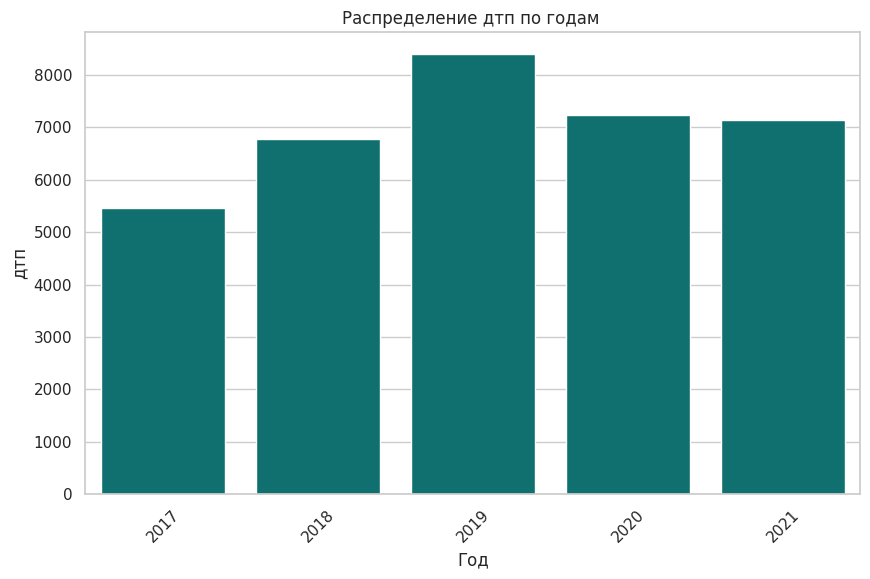

In [ ]:
# 1 Распределение дтп по годам
count_by_year = df['year'].value_counts().sort_index()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=count_by_year.index, y=count_by_year.values, color='teal')


plt.xlabel('Год')
plt.ylabel('дтп')
plt.title('Распределение дтп по годам ')

plt.xticks(rotation=45)

plt.show()

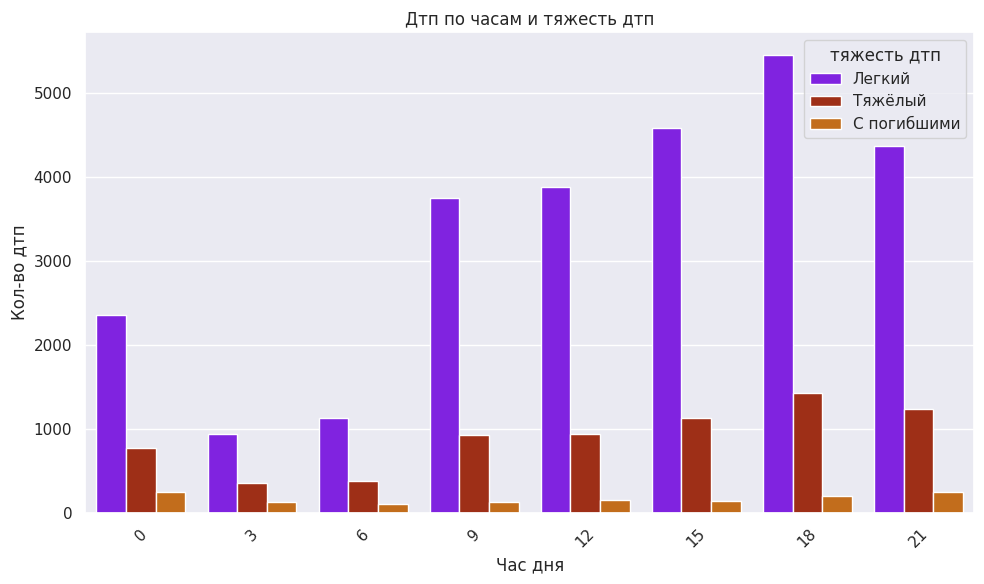

In [ ]:
#2 распределение дтп по часамSS
palette=sns.color_palette('gnuplot')
sns.set(style="darkgrid", palette="gnuplot", context="notebook",)

df['Hour_of_Day'] = df['datetime_round'].dt.hour

severity_hour_dataset = df[['severity', 'Hour_of_Day']].copy()

plt.figure(figsize=(10, 6))
sns.countplot(data=severity_hour_dataset, x='Hour_of_Day', hue='severity', palette='gnuplot')
plt.title('Дтп по часам и тяжесть дтп')
plt.xlabel('Час дня')
plt.ylabel('Кол-во дтп')
plt.legend(title='тяжесть дтп')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

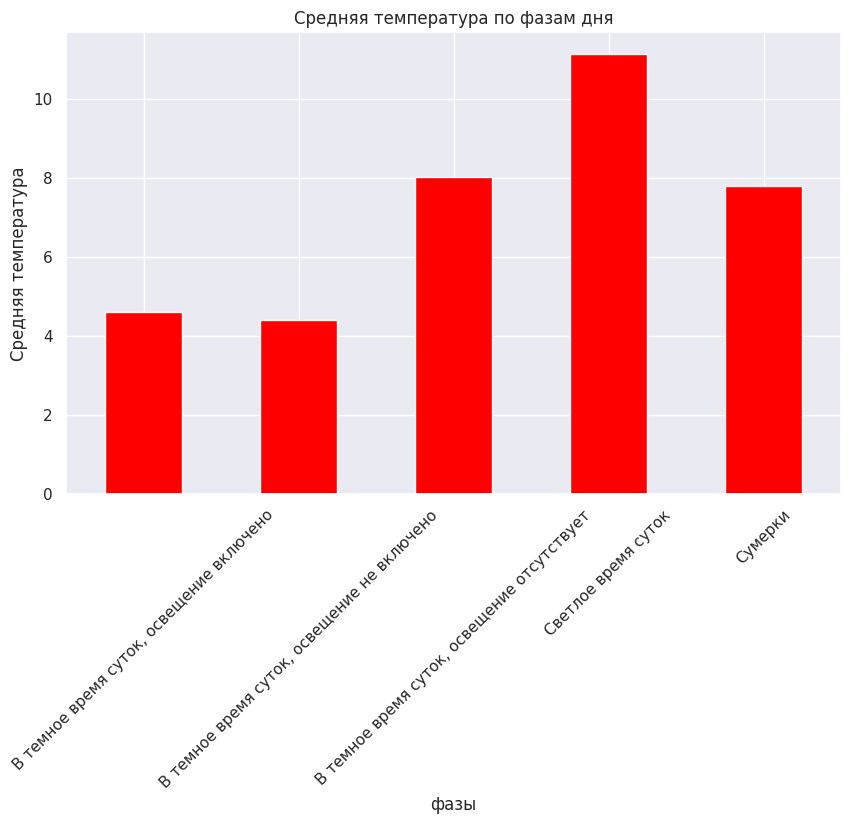

In [ ]:
# 3
temp_mean = df.groupby('light')['temperature'].mean()

plt.figure(figsize=(10, 6))
temp_mean.plot(kind='bar', color='red')
plt.title('Средняя температура по фазам дня')
plt.xlabel('фазы')
plt.ylabel('Средняя температура')
plt.xticks(rotation=45)
plt.show()

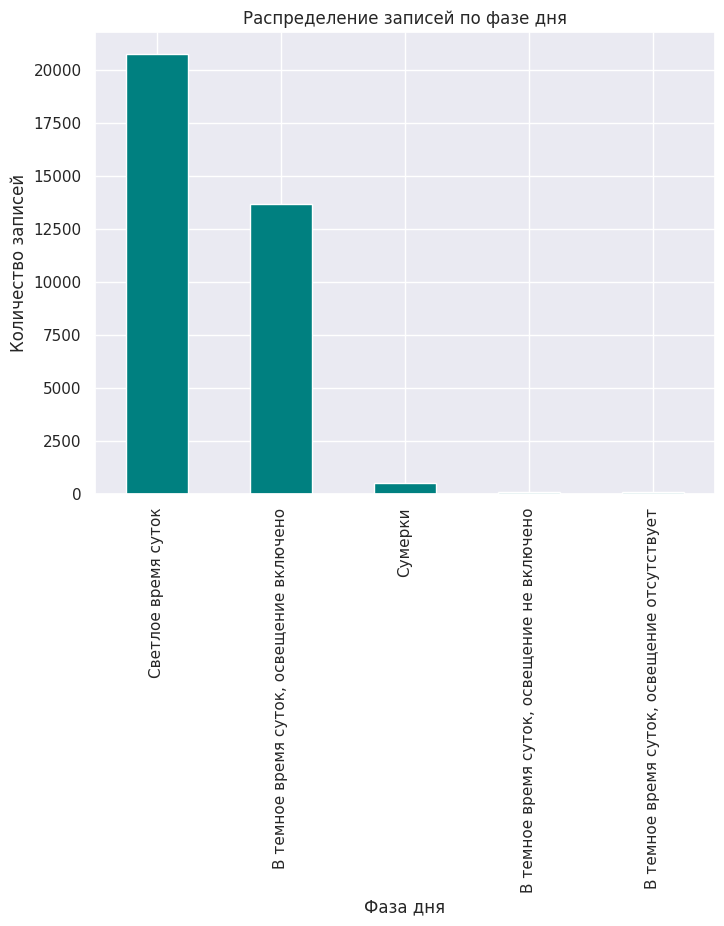

In [ ]:
# 4 количество дтп в датасете по фазам дня, после по условию задачи мы выбрасываем все записи в светлое время суток
count_by_light = df['light'].value_counts()

# Создание столбчатой диаграммы
plt.figure(figsize=(8, 6))
count_by_light.plot(kind='bar', color='teal')

# Настройка подписей осей и заголовка
plt.xlabel('Фаза дня')
plt.ylabel('Количество записей')
plt.title('Распределение записей по фазе дня')

# Отображение графика
plt.show()

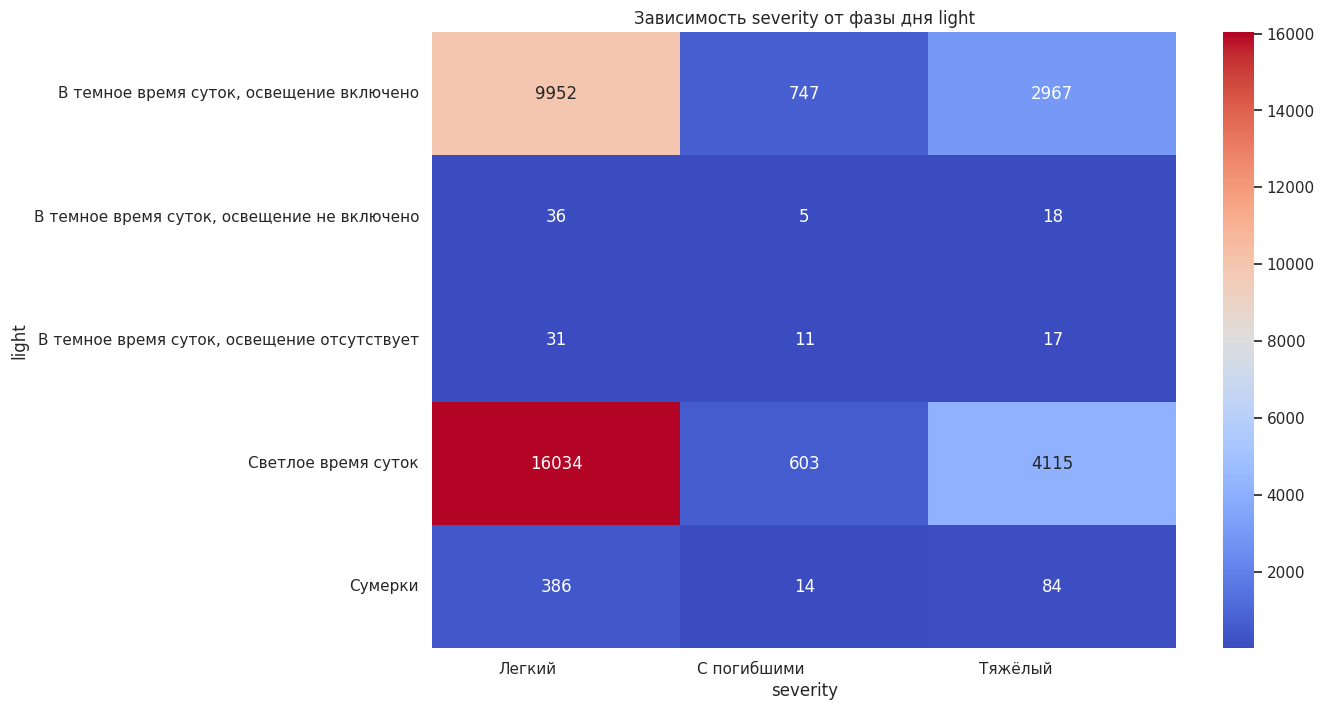

In [ ]:
# 5 тепловая карта,
# отображающая зависимость между показателями фазы дня и степень тяжести дтп в виде матрицы цветов.
pivot_table = pd.crosstab(df['light'], df['severity'])

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='g')
plt.title('Зависимость severity от фазы дня light')
plt.xticks(rotation=0, ha='right')
plt.show()

In [ ]:
!pip install folium
# хочу сделать карту с дтп

In [ ]:

p = df.point[0]
type(p)
# хочу добавить 2 столбца с долготой и широтой места дтп

str

In [ ]:
# Создание новых столбцов "lat" и "long" на основе столбца "point"
df[['lat', 'long']] = df['point'].str.extract(r"'lat': (\d+\.\d+), 'long': (\d+\.\d+)")
df.columns

Index(['join_key', 'datetime_round', 'id', 'light', 'point', 'pogoda_region',
       'region_x', 'address', 'category', 'datetime_x', 'severity',
       'dead_count', 'injured_count', 'parent_region', 'participants_count',
       'datetime_y', 'year', 'month', 'region_y', 'temperature',
       'atmospheric pressure', 'humidity', 'Direction of the wind',
       'Wind speed', 'cloudiness', 'weather conditions', 'Hour_of_Day', 'lat',
       'long'],
      dtype='object')

In [ ]:
df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)
p = df.lat[0]
type(p)


numpy.float64

In [ ]:

df = df.dropna(subset=['lat', 'long'])
df.isnull().sum()

join_key                    0
datetime_round              0
id                          0
light                       0
point                       0
pogoda_region               0
region_x                    0
address                  2481
category                    0
datetime_x                  0
severity                    0
dead_count                  0
injured_count               0
parent_region               0
participants_count          0
datetime_y                  0
year                        0
month                       0
region_y                    0
temperature                 5
atmospheric pressure        1
humidity                    7
Direction of the wind       0
Wind speed                  4
cloudiness                  0
weather conditions       7914
Hour_of_Day                 0
lat                         0
long                        0
dtype: int64

In [ ]:
#6
import folium
from folium.plugins import HeatMap

m = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=4.4)
# поставили начальную среднюю точку на карте для просмотра
data = df[['lat', 'long']].values.tolist()
# приводим к списку долготу и широту
HeatMap(data).add_to(m)

m
# цвет более теплый - в этом районе больше аварий

In [ ]:
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage
#посмотрел процент пропусков по каждому столбцу

join_key                  0.000000
datetime_round            0.000000
id                        0.000000
light                     0.000000
point                     0.000000
pogoda_region             0.000000
region_x                  0.000000
address                   7.084928
category                  0.000000
datetime_x                0.000000
severity                  0.000000
dead_count                0.000000
injured_count             0.000000
parent_region             0.000000
participants_count        0.000000
datetime_y                0.000000
year                      0.000000
month                     0.000000
region_y                  0.000000
temperature               0.014278
atmospheric pressure      0.002856
humidity                  0.019990
Direction of the wind     0.000000
Wind speed                0.011423
cloudiness                0.000000
weather conditions       22.599806
Hour_of_Day               0.000000
lat                       0.000000
long                

In [ ]:
df.drop(columns=['region_y','year','datetime_y','parent_region','datetime_x','join_key', 'id', 'point', 'address','lat','long'], inplace=True)
# удалил ненужные колонки для анализа серьезности дтп

<ipython-input-30-610880cd30a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['region_y','year','datetime_y','parent_region','datetime_x','join_key', 'id', 'point', 'address','lat','long'], inplace=True)


In [ ]:
df

,datetime_round,light,pogoda_region,region_x,category,severity,dead_count,injured_count,participants_count,month,temperature,atmospheric pressure,humidity,Direction of the wind,Wind speed,cloudiness,weather conditions,Hour_of_Day
0,2021-05-21 00:00:00,"В темное время суток, освещение включено",Юго-восток,Люблино,Наезд на стоящее ТС,Легкий,0,2,3,5,11.0,751.6,100.0,В,3.0,0.00,NaN,0
1,2021-05-15 00:00:00,"В темное время суток, освещение включено",Юго-запад,Черемушки,Падение пассажира,Легкий,0,1,2,5,17.0,756.9,68.0,В,4.0,0.20,NaN,0
2,2021-02-10 15:00:00,Светлое время суток,Центр,Арбат,Наезд на пешехода,Легкий,0,1,2,2,-10.6,762.8,66.0,В,2.0,0.95,,15
3,2021-07-18 15:00:00,Светлое время суток,Запад,Ново-Переделкино,Опрокидывание,Легкий,0,1,1,7,30.7,755.7,40.0,В,1.0,0.95,,15
4,2021-07-15 21:00:00,"В темное время суток, освещение включено",Центр,Хамовники,Наезд на препятствие,Легкий,0,1,3,7,23.5,758.5,68.0,"Штиль, безветрие",0.0,0.95,Состояние неба в общем не изменилось.,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35015,2020-11-30 21:00:00,"В темное время суток, освещение включено",Северо-запад,Митино,Наезд на пешехода,Легкий,0,1,2,11,0.3,772.0,90.0,ЮВ,2.0,1.00,Снег непрерывный слабый в срок наблюдения.,21
35016,2020-11-01 21:00:00,"В темное время суток, освещение включено",Северо-запад,Северное Тушино,Столкновение,Легкий,0,3,4,11,4.1,767.8,89.0,В,2.0,1.00,Морось незамерзающая непрерывная слабая в срок...,21
35017,2020-11-09 21:00:00,"В темное время суток, освещение включено",Северо-запад,Строгино,Наезд на велосипедиста,Легкий,0,1,3,11,1.0,766.5,80.0,З,2.0,1.00,Ливневый снег слабый в срок наблюдения или за ...,21
35018,2021-10-10 00:00:00,"В темное время суток, освещение включено",Юго-запад,Южное Бутово,Столкновение,Легкий,0,1,3,10,9.0,773.4,54.0,ЮЗ,2.0,0.00,NaN,0


In [ ]:
!pip install ydata_profiling --use-deprecated=legacy-resolver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 23.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=31243377777579ba2dfe8a0b7fa6fa323678f22aa384cab894c63a2f757c962c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

In [ ]:
!pip install typing_extensions==4.7.1 --upgrade

  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.7.1 which is incompatible.


In [ ]:
# import ydata_profiling

# ydata_profiling.ProfileReport(df)

ImportError: cannot import name 'Buffer' from 'typing_extensions' (/usr/local/lib/python3.10/dist-packages/typing_extensions.py)

In [ ]:
count_by_light = df['light'].value_counts().sort_index()
print(count_by_light)


В темное время суток, освещение включено       13665
В темное время суток, освещение не включено       59
В темное время суток, освещение отсутствует       59
Светлое время суток                            20751
Сумерки                                          484
Name: light, dtype: int64


In [ ]:
df

,datetime_round,light,pogoda_region,region_x,category,severity,dead_count,injured_count,participants_count,month,temperature,atmospheric pressure,humidity,Direction of the wind,Wind speed,cloudiness,weather conditions,Hour_of_Day
0,2021-05-21 00:00:00,"В темное время суток, освещение включено",Юго-восток,Люблино,Наезд на стоящее ТС,Легкий,0,2,3,5,11.0,751.6,100.0,В,3.0,0.00,NaN,0
1,2021-05-15 00:00:00,"В темное время суток, освещение включено",Юго-запад,Черемушки,Падение пассажира,Легкий,0,1,2,5,17.0,756.9,68.0,В,4.0,0.20,NaN,0
2,2021-02-10 15:00:00,Светлое время суток,Центр,Арбат,Наезд на пешехода,Легкий,0,1,2,2,-10.6,762.8,66.0,В,2.0,0.95,,15
3,2021-07-18 15:00:00,Светлое время суток,Запад,Ново-Переделкино,Опрокидывание,Легкий,0,1,1,7,30.7,755.7,40.0,В,1.0,0.95,,15
4,2021-07-15 21:00:00,"В темное время суток, освещение включено",Центр,Хамовники,Наезд на препятствие,Легкий,0,1,3,7,23.5,758.5,68.0,"Штиль, безветрие",0.0,0.95,Состояние неба в общем не изменилось.,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35015,2020-11-30 21:00:00,"В темное время суток, освещение включено",Северо-запад,Митино,Наезд на пешехода,Легкий,0,1,2,11,0.3,772.0,90.0,ЮВ,2.0,1.00,Снег непрерывный слабый в срок наблюдения.,21
35016,2020-11-01 21:00:00,"В темное время суток, освещение включено",Северо-запад,Северное Тушино,Столкновение,Легкий,0,3,4,11,4.1,767.8,89.0,В,2.0,1.00,Морось незамерзающая непрерывная слабая в срок...,21
35017,2020-11-09 21:00:00,"В темное время суток, освещение включено",Северо-запад,Строгино,Наезд на велосипедиста,Легкий,0,1,3,11,1.0,766.5,80.0,З,2.0,1.00,Ливневый снег слабый в срок наблюдения или за ...,21
35018,2021-10-10 00:00:00,"В темное время суток, освещение включено",Юго-запад,Южное Бутово,Столкновение,Легкий,0,1,3,10,9.0,773.4,54.0,ЮЗ,2.0,0.00,NaN,0


In [ ]:
df.columns


Index(['datetime_round', 'light', 'pogoda_region', 'region_x', 'category',
       'severity', 'dead_count', 'injured_count', 'participants_count',
       'month', 'temperature', 'atmospheric pressure', 'humidity',
       'Direction of the wind', 'Wind speed', 'cloudiness',
       'weather conditions', 'Hour_of_Day'],
      dtype='object')

In [ ]:
df['light'].unique()

array(['В темное время суток, освещение включено', 'Светлое время суток',
       'В темное время суток, освещение не включено', 'Сумерки',
       'В темное время суток, освещение отсутствует'], dtype=object)

In [ ]:
df = df[df['light'].isin(['В темное время суток, освещение включено',
       'В темное время суток, освещение не включено', 'Сумерки',
       'В темное время суток, освещение отсутствует'])]


In [ ]:
df['light'].value_counts()

В темное время суток, освещение включено       13665
Сумерки                                          484
В темное время суток, освещение не включено       59
В темное время суток, освещение отсутствует       59
Name: light, dtype: int64

In [ ]:
df['is_weekend'] = (df['datetime_round'].dt.dayofweek >= 5).astype(int)
df

In [ ]:
df2 = df.copy()

# Преобразование столбца datetime_round к типу datetime, если он не является таковым
df2['datetime_round'] = pd.to_datetime(df2['datetime_round'])

# Создание новых столбцов для недели, месяца, сезона, часа и дня
df2['week'] = df2['datetime_round'].dt.isocalendar().week
df2['month'] = df2['datetime_round'].dt.month
df2['season'] = (df2['datetime_round'].dt.month % 12 + 3) // 3  # 1 - весна, 2 - лето, 3 - осень, 4 - зима
df2['hour'] = df2['datetime_round'].dt.hour
df2['day'] = df2['datetime_round'].dt.day_name()

# Рассчет средней температуры за неделю, месяц, сезон, час и день
average_temperature_week = df2.groupby('week')['temperature'].mean()
average_temperature_month = df2.groupby('month')['temperature'].mean()
average_temperature_season = df2.groupby('season')['temperature'].mean()
average_temperature_hour = df2.groupby('hour')['temperature'].mean()
average_temperature_day = df2.groupby('day')['temperature'].mean()

# Вывод результатов
print("Средняя температура по неделям:\n", average_temperature_week)
print("\nСредняя температура по месяцам:\n", average_temperature_month)
print("\nСредняя температура по сезонам:\n", average_temperature_season)
print("\nСредняя температура по часам:\n", average_temperature_hour)
print("\nСредняя температура по дням недели:\n", average_temperature_day)

Средняя температура по неделям:
 week
1     -2.893146
2     -6.732673
3     -3.224093
4     -3.366839
5     -4.467584
6     -6.331802
7     -3.588129
8     -3.582119
9     -2.544928
10    -1.353710
11     0.370385
12     1.920635
13     2.790385
14     4.539423
15     7.360428
16     5.986335
17     8.341358
18    11.406061
19    12.903289
20    14.802143
21    13.594030
22    14.392969
23    14.865217
24    16.845902
25    20.244697
26    17.190299
27    18.172263
28    19.206849
29    17.151829
30    18.719632
31    17.708989
32    17.954974
33    17.984834
34    16.507583
35    15.527727
36    15.329758
37    13.255914
38    10.354438
39     8.328060
40     8.618367
41     8.904878
42     8.146237
43     6.010922
44     3.695778
45     4.584112
46     1.490744
47    -1.526164
48    -1.726799
49    -1.746154
50    -1.184450
51    -2.262168
52    -1.571220
53    -3.891667
Name: temperature, dtype: float64

Средняя температура по месяцам:
 month
1     -3.846751
2     -4.456333
3      0

In [ ]:
df.isnull().sum()

datetime_round              0
light                       0
pogoda_region               0
region_x                    0
category                    0
severity                    0
dead_count                  0
injured_count               0
participants_count          0
month                       0
temperature                 4
atmospheric pressure        0
humidity                    5
Direction of the wind       0
Wind speed                  3
cloudiness                  0
weather conditions       3029
Hour_of_Day                 0
is_weekend                  0
dtype: int64

In [ ]:
print(df.columns)


Index(['datetime_round', 'light', 'pogoda_region', 'region_x', 'category',
       'severity', 'dead_count', 'injured_count', 'participants_count',
       'month', 'temperature', 'atmospheric pressure', 'humidity',
       'Direction of the wind', 'Wind speed', 'cloudiness',
       'weather conditions', 'Hour_of_Day', 'is_weekend'],
      dtype='object')


In [ ]:
df.describe()

,dead_count,injured_count,participants_count,month,temperature,atmospheric pressure,humidity,Wind speed,cloudiness,Hour_of_Day,is_weekend
count,14267.000000,14267.000000,14267.000000,14267.000000,14263.000000,14267.000000,14262.000000,14264.000000,14267.000000,14267.000000,14267.000000
mean,0.059087,1.155183,2.445013,7.178384,4.739816,761.729719,79.035970,1.825014,0.685070,12.627252,0.285975
std,0.257127,0.614696,0.908147,3.852614,8.914783,8.162941,15.288352,1.726785,0.401568,8.866289,0.451893
min,0.000000,0.000000,1.000000,1.000000,-27.700000,724.700000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,3.000000,-1.000000,756.700000,71.000000,1.000000,0.400000,3.000000,0.000000
50%,0.000000,1.000000,2.000000,8.000000,3.100000,761.500000,83.000000,1.000000,0.950000,18.000000,0.000000
75%,0.000000,1.000000,3.000000,11.000000,11.400000,766.800000,91.000000,3.000000,1.000000,21.000000,1.000000
max,4.000000,12.000000,13.000000,12.000000,32.000000,787.400000,100.000000,13.000000,1.000000,21.000000,1.000000


In [ ]:
severity_mapping = {'Легкий': 0, 'Тяжёлый': 1, 'С погибшими': 2}

# Преобразование значений столбца severity в числа с помощью метода map() и .loc[]
df.loc[:, 'target'] = df['severity'].map(severity_mapping)


<ipython-input-47-5d1828580978>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'target'] = df['severity'].map(severity_mapping)


In [ ]:
df.isnull().sum()

datetime_round              0
light                       0
pogoda_region               0
region_x                    0
category                    0
severity                    0
dead_count                  0
injured_count               0
participants_count          0
month                       0
temperature                 4
atmospheric pressure        0
humidity                    5
Direction of the wind       0
Wind speed                  3
cloudiness                  0
weather conditions       3029
Hour_of_Day                 0
is_weekend                  0
target                      0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(11230, 20)

In [ ]:
df.dtypes

datetime_round           datetime64[ns]
light                            object
pogoda_region                    object
region_x                         object
category                         object
severity                         object
dead_count                        int64
injured_count                     int64
participants_count                int64
month                             int64
temperature                     float64
atmospheric pressure            float64
humidity                        float64
Direction of the wind            object
Wind speed                      float64
cloudiness                      float64
weather conditions               object
Hour_of_Day                       int64
is_weekend                        int64
target                            int64
dtype: object

In [ ]:

df = df.drop(columns=['severity','region_x','pogoda_region','Direction of the wind','datetime_round'])

In [ ]:
categorical_columns = ['light', 'weather conditions','category']

df_encoded = pd.get_dummies(df, columns=categorical_columns)

numeric_columns = ['temperature', 'humidity', 'Wind speed','injured_count','participants_count','dead_count']



In [ ]:
df.columns


Index(['light', 'category', 'dead_count', 'injured_count',
       'participants_count', 'month', 'temperature', 'atmospheric pressure',
       'humidity', 'Wind speed', 'cloudiness', 'weather conditions',
       'Hour_of_Day', 'is_weekend', 'target'],
      dtype='object')

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
df_encoded = df_encoded.sample(frac=1)
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

X_resampled, y_resampled = RandomUnderSampler().fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((1435, 122), (359, 122), (1435,), (359,))

In [ ]:
!pip install tpot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 918.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=7df87a2c15da4b068f3e43d133a2e9cbfa330ef25e1698a7b1ccf84f0cbc5c9a
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.model_selection import RepeatedKFold
from tpot import TPOTClassifier

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    scoring='accuracy',
    cv=cv,
    verbosity=2,
    random_state=1,
    n_jobs=-1
)
#Параметры tpot

In [ ]:
tpot.fit(X_train, y_train)
#Обучаю auto-ml и получаем параметры луучшей модели

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.15000000000000002)
X_train_bin = binarizer.fit_transform(X_train)

best_model = MultinomialNB(alpha=100.0, fit_prior=False)
best_model.fit(X_train_bin, y_train)

X_test_bin = binarizer.transform(X_test)
y_pred = best_model.predict(X_test_bin)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy, 5)}')

y_train_pred = best_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(accuracy_train)

Accuracy: 0.65181
0.3463414634146341


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
